<h2>Comparative Study</h2>
<p>
Objective: Evaluate and compare different search algorithms.
<br>
Problem Statement: Given a domain (e.g., pathfinding, puzzle solving), evaluate BFS, DFS, Bi-directional BFS, Uniform Cost Search, Best-First Search, and A* Search.
<br>
Tasks:<br>
Analyze:<br>
Efficiency: Nodes explored, time taken.<br>
Optimality: Whether the solution is optimal.<br>
Create visualizations to compare algorithms</p>


BFS: Path length=9, Nodes explored=16, Time=0.0s
DFS: Path length=9, Nodes explored=10, Time=0.0s
Bi-BFS: Path length=9, Nodes explored=16, Time=0.0s
UCS: Path length=9, Nodes explored=15, Time=0.0s
Best-First: Path length=9, Nodes explored=9, Time=0.0s
A*: Path length=9, Nodes explored=11, Time=0.0s


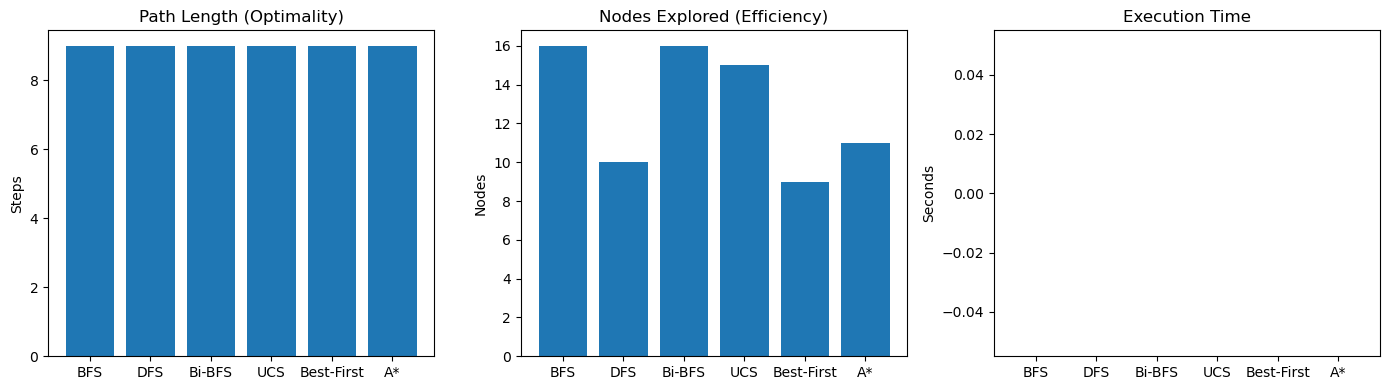

In [4]:
import time
import matplotlib.pyplot as plt
from queue import PriorityQueue, Queue, LifoQueue

# Sample grid map
grid = [
    [0, 0, 0, 0, 0],
    [1, 1, 0, 1, 0],
    [0, 0, 0, 1, 0],
    [0, 1, 1, 1, 0],
    [0, 0, 0, 0, 0]
]

start = (0, 0)
goal = (4, 4)

def get_neighbors(pos):
    directions = [(-1,0),(1,0),(0,-1),(0,1)]
    for dx, dy in directions:
        nx, ny = pos[0]+dx, pos[1]+dy
        if 0 <= nx < len(grid) and 0 <= ny < len(grid[0]) and grid[nx][ny] == 0:
            yield (nx, ny)

def reconstruct_path(came_from, current):
    path = [current]
    while current in came_from:
        current = came_from[current]
        path.append(current)
    path.reverse()
    return path

# Search Algorithms
def bfs(start, goal):
    frontier = Queue()
    frontier.put(start)
    came_from = {}
    visited = set()
    visited.add(start)

    while not frontier.empty():
        current = frontier.get()
        if current == goal:
            return reconstruct_path(came_from, goal), len(visited)
        for neighbor in get_neighbors(current):
            if neighbor not in visited:
                visited.add(neighbor)
                frontier.put(neighbor)
                came_from[neighbor] = current
    return None, len(visited)

def dfs(start, goal):
    frontier = LifoQueue()
    frontier.put(start)
    came_from = {}
    visited = set()
    visited.add(start)

    while not frontier.empty():
        current = frontier.get()
        if current == goal:
            return reconstruct_path(came_from, goal), len(visited)
        for neighbor in get_neighbors(current):
            if neighbor not in visited:
                visited.add(neighbor)
                frontier.put(neighbor)
                came_from[neighbor] = current
    return None, len(visited)

def bi_bfs(start, goal):
    frontier1 = Queue()
    frontier2 = Queue()
    frontier1.put(start)
    frontier2.put(goal)
    visited1 = {start}
    visited2 = {goal}
    came_from1 = {}
    came_from2 = {}

    while not frontier1.empty() and not frontier2.empty():
        def expand(frontier, visited, other_visited, came_from):
            current = frontier.get()
            for neighbor in get_neighbors(current):
                if neighbor not in visited:
                    visited.add(neighbor)
                    frontier.put(neighbor)
                    came_from[neighbor] = current
                    if neighbor in other_visited:
                        return neighbor
            return None

        meet = expand(frontier1, visited1, visited2, came_from1)
        if meet:
            path1 = reconstruct_path(came_from1, meet)
            path2 = reconstruct_path(came_from2, meet)
            return path1[:-1] + path2[::-1], len(visited1) + len(visited2)

        meet = expand(frontier2, visited2, visited1, came_from2)
        if meet:
            path1 = reconstruct_path(came_from1, meet)
            path2 = reconstruct_path(came_from2, meet)
            return path1[:-1] + path2[::-1], len(visited1) + len(visited2)

    return None, len(visited1) + len(visited2)

def ucs(start, goal):
    frontier = PriorityQueue()
    frontier.put((0, start))
    came_from = {}
    cost_so_far = {start: 0}
    visited = set()

    while not frontier.empty():
        cost, current = frontier.get()
        visited.add(current)

        if current == goal:
            return reconstruct_path(came_from, goal), len(visited)

        for neighbor in get_neighbors(current):
            new_cost = cost_so_far[current] + 1
            if neighbor not in cost_so_far or new_cost < cost_so_far[neighbor]:
                cost_so_far[neighbor] = new_cost
                frontier.put((new_cost, neighbor))
                came_from[neighbor] = current
    return None, len(visited)

def best_first(start, goal):
    frontier = PriorityQueue()
    frontier.put((heuristic(start, goal), start))
    came_from = {}
    visited = set()

    while not frontier.empty():
        _, current = frontier.get()
        visited.add(current)

        if current == goal:
            return reconstruct_path(came_from, goal), len(visited)

        for neighbor in get_neighbors(current):
            if neighbor not in visited:
                frontier.put((heuristic(neighbor, goal), neighbor))
                came_from[neighbor] = current
    return None, len(visited)

def a_star(start, goal):
    frontier = PriorityQueue()
    frontier.put((0, start))
    came_from = {}
    cost_so_far = {start: 0}
    visited = set()

    while not frontier.empty():
        _, current = frontier.get()
        visited.add(current)

        if current == goal:
            return reconstruct_path(came_from, goal), len(visited)

        for neighbor in get_neighbors(current):
            new_cost = cost_so_far[current] + 1
            if neighbor not in cost_so_far or new_cost < cost_so_far[neighbor]:
                cost_so_far[neighbor] = new_cost
                priority = new_cost + heuristic(neighbor, goal)
                frontier.put((priority, neighbor))
                came_from[neighbor] = current
    return None, len(visited)

def heuristic(a, b):
    return abs(a[0]-b[0]) + abs(a[1]-b[1])

# Comparative runner
def run_all():
    algorithms = {
        'BFS': bfs,
        'DFS': dfs,
        'Bi-BFS': bi_bfs,
        'UCS': ucs,
        'Best-First': best_first,
        'A*': a_star
    }
    results = {}
    for name, func in algorithms.items():
        start_time = time.time()
        path, nodes = func(start, goal)
        end_time = time.time()
        results[name] = {
            'Length': len(path) if path else float('inf'),
            'Nodes': nodes,
            'Time': round(end_time - start_time, 5)
        }
    return results

# Run and visualize
results = run_all()

# Display results
for algo, data in results.items():
    print(f"{algo}: Path length={data['Length']}, Nodes explored={data['Nodes']}, Time={data['Time']}s")

# Visualization
algos = list(results.keys())
lengths = [results[a]['Length'] for a in algos]
nodes = [results[a]['Nodes'] for a in algos]
times = [results[a]['Time'] for a in algos]

plt.figure(figsize=(14, 4))

plt.subplot(1, 3, 1)
plt.bar(algos, lengths)
plt.title("Path Length (Optimality)")
plt.ylabel("Steps")

plt.subplot(1, 3, 2)
plt.bar(algos, nodes)
plt.title("Nodes Explored (Efficiency)")
plt.ylabel("Nodes")

plt.subplot(1, 3, 3)
plt.bar(algos, times)
plt.title("Execution Time")
plt.ylabel("Seconds")

plt.tight_layout()
plt.show()
